In [28]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
# Requires-Python: >=3.10

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from dateutil import parser
from datetime import timedelta,timezone

In [29]:
# Basic setting
SCATTERP_SIZE_DEFAULT = 50
ALPHA_DEFAULT = 0.7
# ---- Global style knobs (safe to tweak) ----
plt.rcParams.update({
    "figure.dpi": 160,
    "savefig.dpi": 160,
    "font.size": 12,
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
})


In [30]:
# Colors
blue_colors = [
    "#0B3C8C",  # Navy Blue（深海军蓝）
    "#154FA6",
    "#1E63C0",
    "#2A78DA",
    "#3A8DF0",
    "#62A9F7",
    "#8BC3FB",
    "#B5DAFE",
    "#D7EBFF",
]
teal_colors = [
    "#005A55",  # Deep Teal
    "#00756E",
    "#009088",
    "#00ABA2",
    "#27C2B7",
    "#55D6CA",
    "#87E6DA",
    "#B6F2EA",
    "#DDFBF6",
]
green_colors = [
    "#0A4E1F",  # Forest Green / Deep Forest Green
    "#146A2D",
    "#20863B",
    "#2DA34A",
    "#52BB6A",
    "#7DD897",
    "#A7E8B8",
    "#CFF5D9",
    "#E8FDF0",
]
orange_colors = [
    "#7A3C00",  # Burnt Orange
    "#9B5200",
    "#BC6800",
    "#D77F00",
    "#F19626",
    "#F7B86C",
    "#F9D3A2",
    "#FBE8CE",
    "#FEF6E8",
]
RED_COLOR_DEFAULT = "#d62728"
BLUE_COLOR_ORIGINAL = "#1f77b4"
BLUE_COLOR_DEFAULT = blue_colors[2]
TEAL_COLOR_DEFAULT = teal_colors[2]
ORANGE_COLOR_DEFAULT = orange_colors[2]
PINK_COLOR_DEFAULT = "#f700ff"
GRAY_COLOR_DEFAULT = "#cccccc"

In [31]:
# Read data from bug_csv_v2.csv (without added source/sink connector information)
df = pd.read_csv("bug_csv_v2.csv")

# Finding 5: Comment Count vs Comment Chars
# Fig 5
df_f5_copy = df.dropna(subset=["tool_total_comments_count", "tool_total_chars"]).copy()
df_f5_copy["tool_total_comments_count"] = df_f5_copy[
    "tool_total_comments_count"
].astype(float)
df_f5_copy["tool_total_chars"] = df_f5_copy["tool_total_chars"].astype(float)

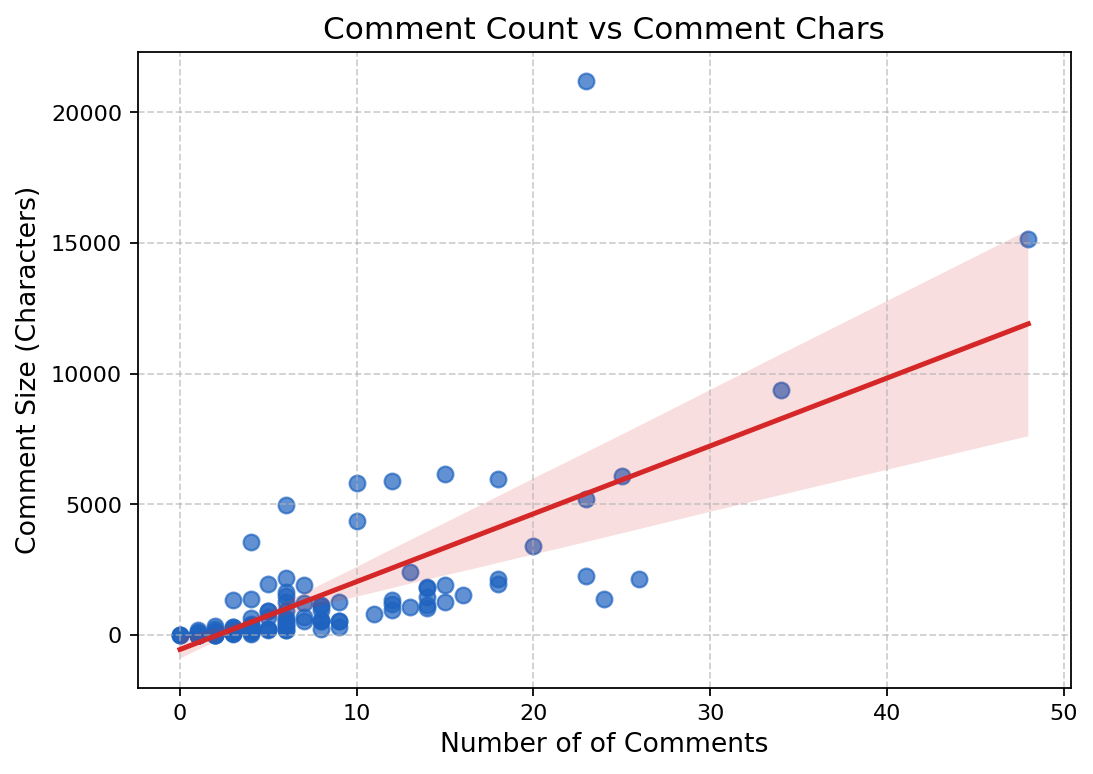

In [32]:
fig5_1, ax5_1 = plt.subplots(figsize=(7, 5))
# linear regression line and its confidence interval (95% confidence band).
# y = β0 + β1 * x
sns.regplot(
    data=df_f5_copy,
    x="tool_total_comments_count",
    y="tool_total_chars",
    scatter_kws={"alpha": 0.7, "s": SCATTERP_SIZE_DEFAULT},
    line_kws={"color": RED_COLOR_DEFAULT},
    ax=ax5_1,
    color=BLUE_COLOR_DEFAULT,
)
ax5_1.set_title("Comment Count vs Comment Chars", fontsize=14)
ax5_1.set_xlabel("Number of of Comments")
ax5_1.set_ylabel("Comment Size (Characters)")
ax5_1.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

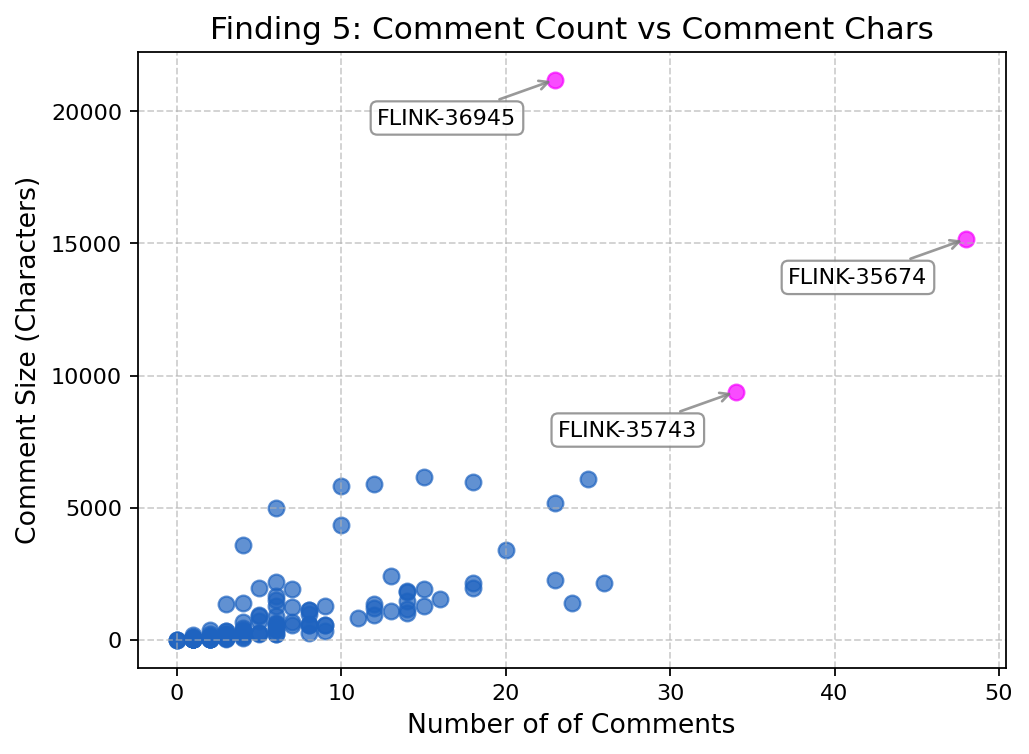

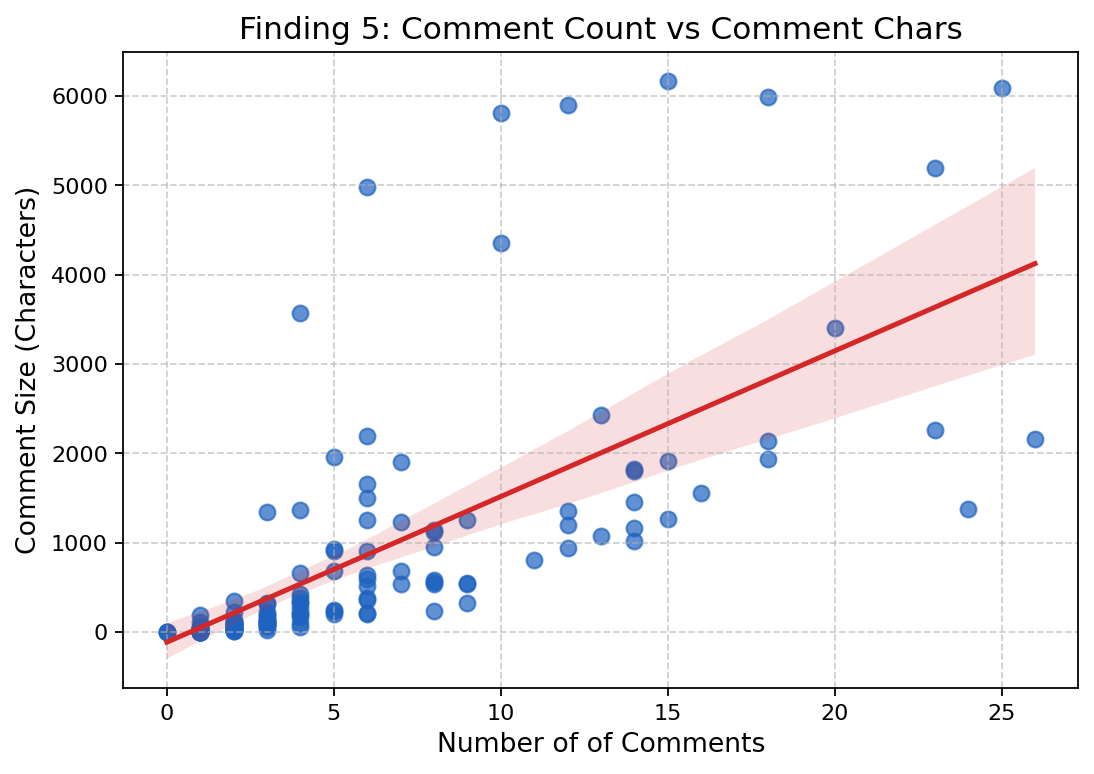

In [33]:

count_threshold = 30
chars_threshold = 20000
df_f5_copy_main = df_f5_copy[
    (df_f5_copy["tool_total_comments_count"] <= count_threshold)
    & (df_f5_copy["tool_total_chars"] <= chars_threshold)
]
df_f5_copy_outliers = df_f5_copy[
    (df_f5_copy["tool_total_comments_count"] > count_threshold)
    | (df_f5_copy["tool_total_chars"] > chars_threshold)
]
fig5_2, ax5_2 = plt.subplots(figsize=(7,5))
# Main
ax5_2.scatter(
    x=df_f5_copy_main["tool_total_comments_count"],
    y=df_f5_copy_main["tool_total_chars"],
    s=SCATTERP_SIZE_DEFAULT,
    alpha=0.7,
    color=BLUE_COLOR_DEFAULT,
)
ax5_2.scatter(
    x=df_f5_copy_outliers["tool_total_comments_count"],
    y=df_f5_copy_outliers["tool_total_chars"],
    s=SCATTERP_SIZE_DEFAULT,
    alpha=0.7,
    color=PINK_COLOR_DEFAULT,
)
# Annotation + annotation arrowprops
for i, row in df_f5_copy_outliers.iterrows():
  ax5_2.annotate(
    text=row["Bug编号"],
    xy=(
            row["tool_total_comments_count"],
            row["tool_total_chars"]
        ),                     # ← outlier 点坐标
        xytext=(-80, -20),       # ← 标签相对偏移（像素）
        textcoords='offset points',
        fontsize=10,
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8),
        arrowprops=dict(
            arrowstyle="->",
            color="gray",
            lw=1.2,
            alpha=0.8
        )
  )

# Purple
# sns.scatterplot(
#     data=df_f5_copy_outliers,
#     x="tool_total_comments_count",
#     y="tool_total_chars",
#     color="#f700ff",
#     s=SCATTERP_SIZE_DEFAULT*1.5,
#     alpha=0.7,
#     ax=ax5_2,
#     ="Outliers"
# )
# ax5_2.set_title("Finding 5: Comment Count vs Comment Chars", fontsize=14)
ax5_2.set_title("Finding 5: Comment Count vs Comment Chars")
ax5_2.set_xlabel("Number of of Comments")
ax5_2.set_ylabel("Comment Size (Characters)")
ax5_2.grid(True, linestyle="--", alpha=0.6)
# ax5_2.legend()
plt.show()


fig5_3, ax5_3 = plt.subplots(figsize=(7, 5))
sns.regplot(
    data=df_f5_copy_main,
    x="tool_total_comments_count",
    y="tool_total_chars",
    scatter_kws={"alpha": 0.7, "s": SCATTERP_SIZE_DEFAULT},
    line_kws={"color": "#d62728"},
    ax=ax5_3,
    color= BLUE_COLOR_DEFAULT,
)

# ax5_3.set_title("Finding 5: Comment Count vs Comment Chars", fontsize=14)
ax5_3.set_title("Finding 5: Comment Count vs Comment Chars")
ax5_3.set_xlabel("Number of of Comments")
ax5_3.set_ylabel("Comment Size (Characters)")
ax5_3.grid(True, linestyle="--", alpha=0.6)


plt.tight_layout()
plt.show()


In [34]:
# Finding 1: Distribution of CDC
import pandas as pd
import re
from collections import Counter


def split_multi_values(val, sep=r";"):
    """Split fields like 'MySQL; PostgreSQL' into ['MySQL', 'PostgreSQL']."""
    if pd.isna(val):
        return []
    s = str(val)
    return [p.strip() for p in re.split(sep, s) if p.strip()]


def aggregate_components(df, column_names: list[str]):
    """Aggregate multi columns and return frequency dict."""
    counter = Counter()

    for _, row in df.iterrows():
        merged = []
        for c in column_names:
            l = split_multi_values(row.get(c), sep=r"[;；,]")
            merged += l
        for item in merged:
            counter[item] += 1
    return dict(counter.most_common())


df = pd.read_csv("bug_resolved_csv_v3.csv")
db_counts = aggregate_components(df, ["Source数据库类型", "Sink数据库类型"])
print(db_counts)

{'MySQL': 58, 'Runtime': 36, 'Paimon': 13, 'Doris': 10, 'StarRocks': 9, 'SQL Server': 9, 'Oracle': 8, 'PostgreSQL': 7, 'MongoDB': 6, 'Docs': 6, 'Values': 5, 'Kafka': 5, 'Iceberg': 3, 'DB2': 2, 'Elasticsearch': 2, 'OceanBase': 1, 'MaxCompute': 1}


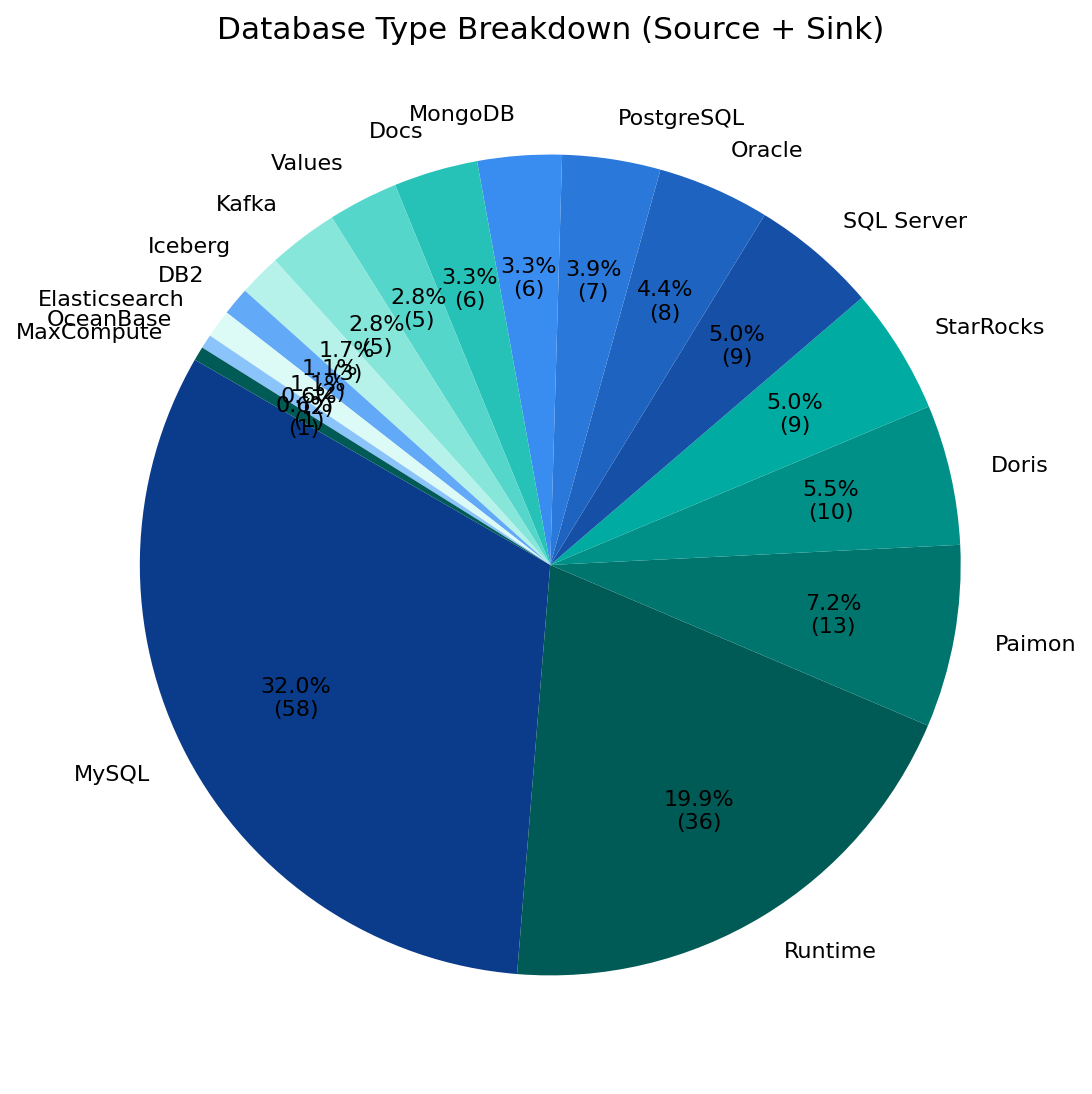

In [35]:
# Finding 1: Distribution of CDC
# Fig 1:
source_set = {"MySQL", "PostgreSQL", "MongoDB", "SQL Server", "Oracle", "DB2", "OceanBase", "Vitness", "TiDB"}
sink_set = {"StarRocks", "Doris", "Kafka", "Paimon", "Iceberg", "Elasticsearch", "Fluss", "MaxCompute", "Values"}

labels = list(db_counts.keys())
values = list(db_counts.values())

# --------------------------
# 2. Distribute colors（Source = Blue Family，Sink = Teal Family）
# --------------------------
colors = []
blue_idx = 0
teal_idx = 0
for lab in labels:
    if lab in source_set:
        colors.append(blue_colors[blue_idx % len(blue_colors)])
        blue_idx += 1
    else:
        colors.append(teal_colors[teal_idx % len(teal_colors)])
        teal_idx += 1

# --------------------------
# 3. Percentage format
# --------------------------
def autopct_fmt(pct, allvals):
    total = sum(allvals)
    count = int(round(pct/100.0 * total))
    return f"{pct:.1f}%\n({count})"

# --------------------------
# 4. Plot Pie
# --------------------------
fig1_1, ax1_1 = plt.subplots(figsize=(8, 7))

ax1_1.pie(
    values,
    labels=labels,
    colors=colors,
    startangle=150,
    autopct=lambda pct: autopct_fmt(pct, values),
    pctdistance=0.70,
    textprops={"fontsize": 10}
)

ax1_1.set_title("Database Type Breakdown (Source + Sink)", fontsize=14)
fig1_1.tight_layout()

plt.show()

['MySQL', 'SQL Server', 'Oracle', 'PostgreSQL', 'MongoDB', 'DB2', 'OceanBase', 'Paimon', 'Doris', 'StarRocks', 'Values', 'Kafka', 'Iceberg', 'Elasticsearch', 'MaxCompute', 'Runtime', 'Docs']
[58, 9, 8, 7, 6, 2, 1, 13, 10, 9, 5, 5, 3, 2, 1, 36, 6]


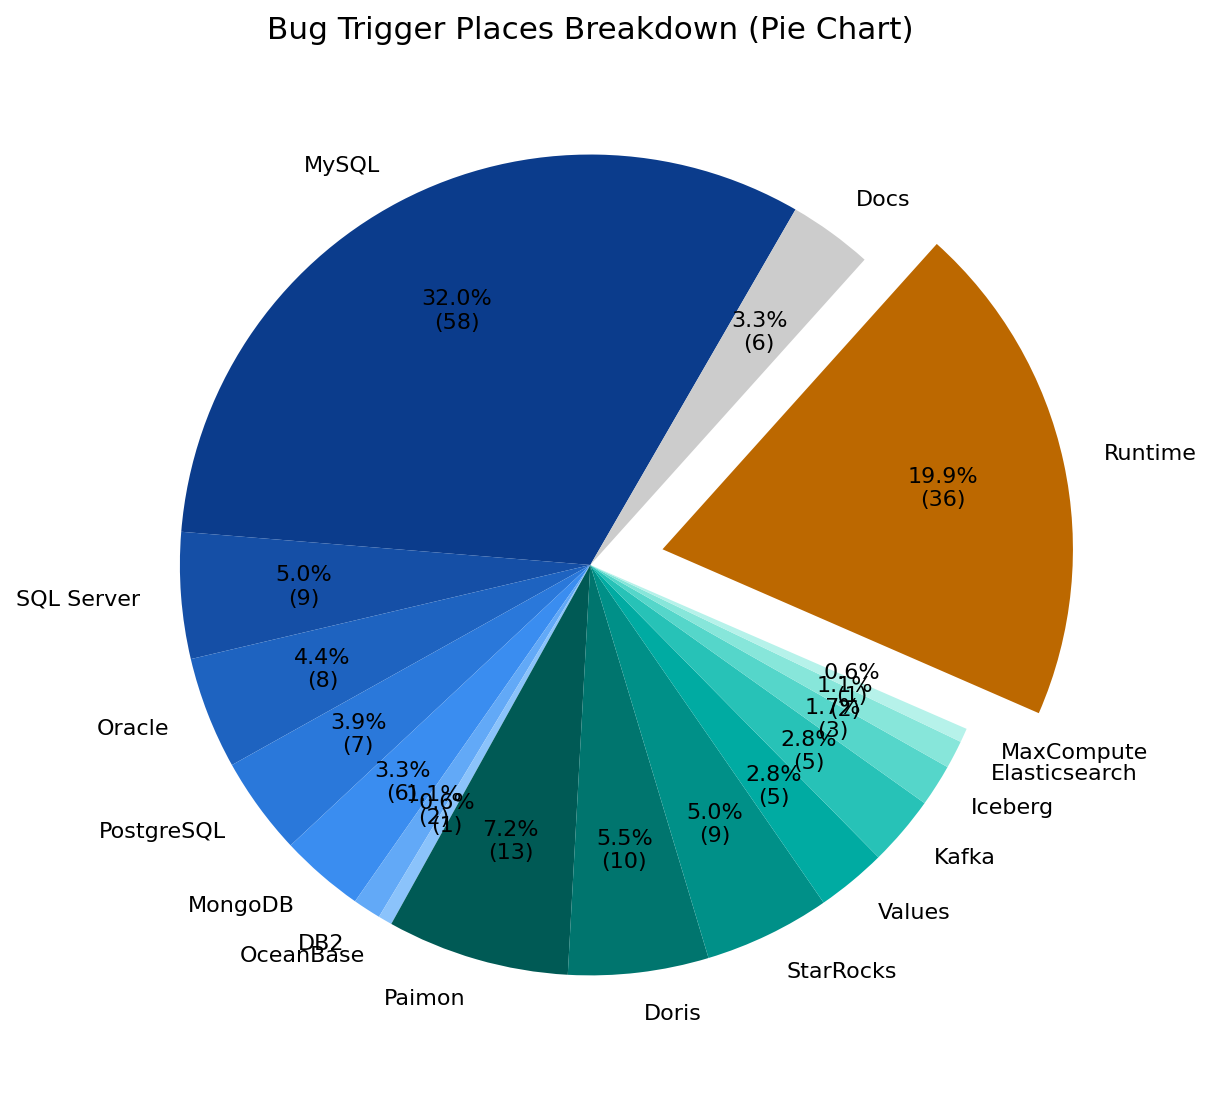

In [36]:
items = list(db_counts.items())
# Re-order as Source -> Sink -> Runtime

reordered_items = []
for k, v in items:
  if k in source_set:
    reordered_items.append((k,v))

for k, v in items:
  if k in sink_set:
    reordered_items.append((k,v))

for k, v in items:
  if k == "Runtime":
    reordered_items.append((k,v))

for k, v in items:
  if k == "Docs":
    reordered_items.append((k,v))

for k, v in items:
    if (k not in source_set) and (k not in sink_set) and (k != "Runtime") and (k != "Docs"):
        print(k,v)
        raise ValueError("Unsupported source/sink database type.")

# Re-order colors
reordered_labels = [x[0] for x in reordered_items]
print(reordered_labels)
reordered_values = [x[1] for x in reordered_items]
print(reordered_values)
reordered_colors = []

reordered_blue_idx = 0
reordered_teal_idx = 0

for lab in reordered_labels:
  if lab in source_set:
    reordered_colors.append(blue_colors[reordered_blue_idx])
    reordered_blue_idx+=1
  elif lab in sink_set:
    reordered_colors.append(teal_colors[reordered_teal_idx])
    reordered_teal_idx+=1
  elif lab == "Runtime":
    reordered_colors.append(ORANGE_COLOR_DEFAULT)
  elif lab == "Docs":
    reordered_colors.append(GRAY_COLOR_DEFAULT)

# Re-order explode
reordered_explode = []

for lab in reordered_labels:
    # if lab in source_set:
    #     reordered_explode.append(0.09)
    # elif lab in sink_set:
    #     reordered_explode.append(0.12)
    if lab == "Runtime":
        reordered_explode.append(0.18)
    elif lab == "Docs":
       reordered_explode.append(0.00)
    else:
        reordered_explode.append(0.00)

fig1_2, ax1_2 = plt.subplots(figsize=(8, 7))

ax1_2.pie(
    reordered_values,
    labels=reordered_labels,
    colors=reordered_colors,
    explode=reordered_explode,
    startangle=60,
    autopct=lambda pct: autopct_fmt(pct, values),
    pctdistance=0.70,
    textprops={"fontsize": 10},
    # wedgeprops={"linewidth": 1.0, "edgecolor": "white"},
)

ax1_2.set_title("Bug Trigger Places Breakdown (Pie Chart)", fontsize=14)
fig1_2.tight_layout()
plt.show()

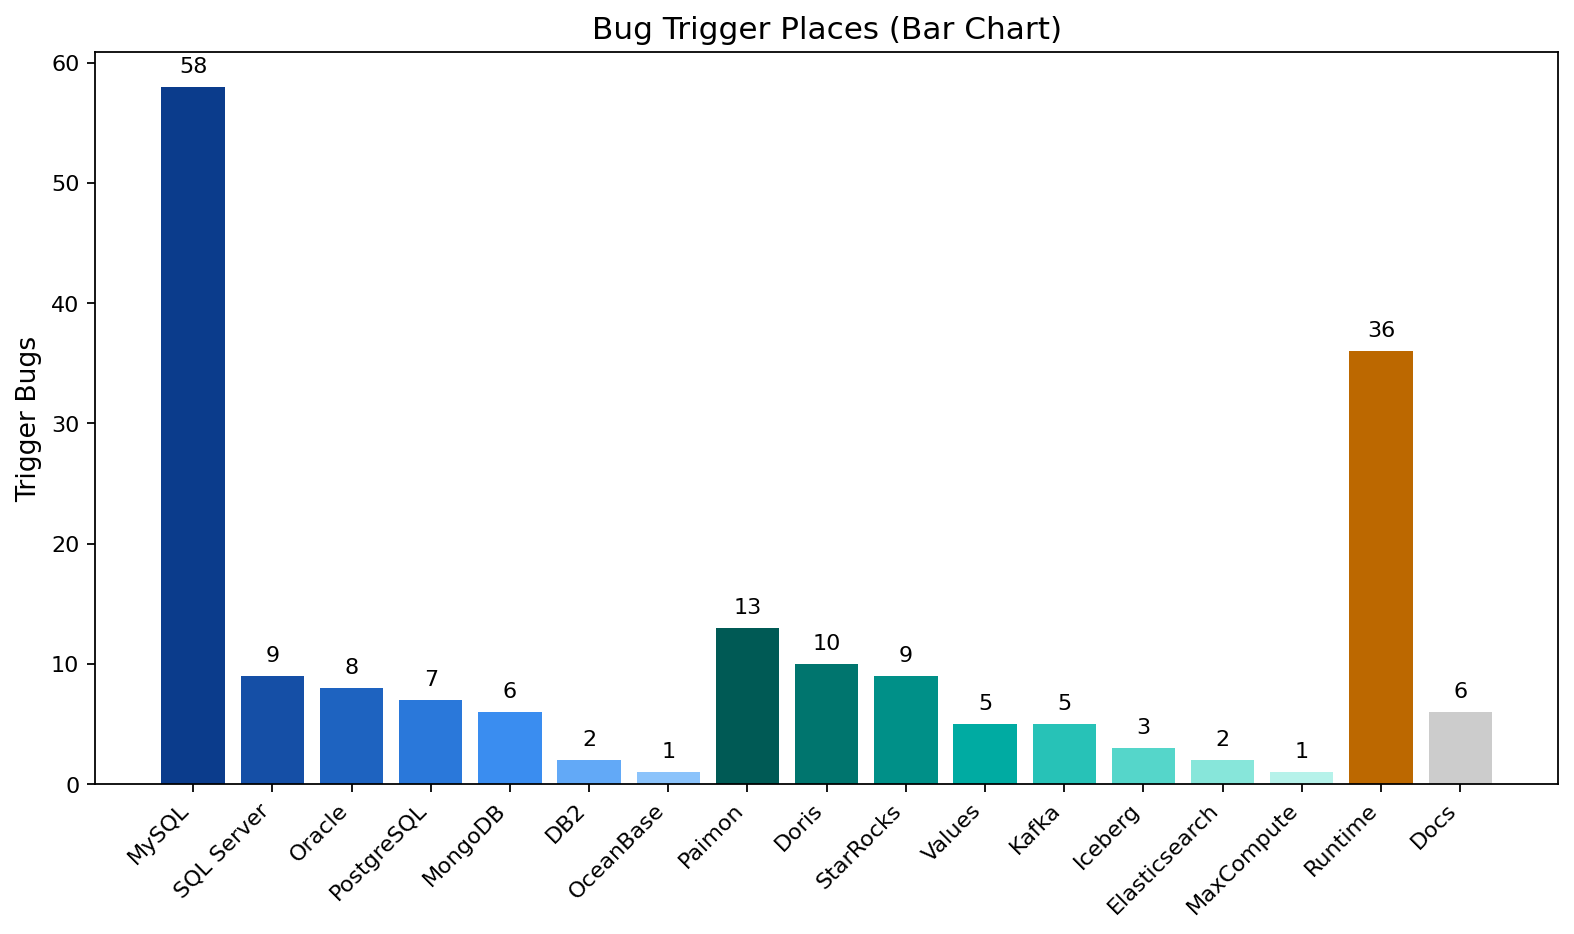

In [37]:
fig1_3, ax1_3 = plt.subplots(figsize=(10,6))
# We reuse: reordered_labels, reordered_values, reordered_colors

# X-axis positions
x_positions = np.arange(len(reordered_labels))

# Draw bars
ax1_3.bar(
    x_positions,
    reordered_values,
    color=reordered_colors,
    # edgecolor="gray",
    linewidth=0.8
)

# Labeling
ax1_3.set_xticks(x_positions)
ax1_3.set_xticklabels(reordered_labels, rotation=45, ha="right")

ax1_3.set_ylabel("Trigger Bugs")
ax1_3.set_title("Bug Trigger Places (Bar Chart)", fontsize=14)

# Adding numeric annotations on top of bars
for i, v in enumerate(reordered_values):
    ax1_3.text(i, v + max(reordered_values)*0.015, 
             str(v),
             ha="center", va="bottom", fontsize=10)

fig1_3.tight_layout()
plt.show()

In [38]:
# Finding 2: Relationship between content/comment chars and fixed time

## Normalize time in ISO8601 format
def normalize_datetime_column(df, colname, utc=True):
    """
    Normalize any datetime-like column into strict ISO 8601 format.
    Parameters:
        df (pd.DataFrame)
        colname (str): column name to normalize
        utc (bool): convert to UTC with Z suffix
    Returns:
        pd.DataFrame (modified in-place)
    """
    def parse_to_iso8601(val):
        if pd.isna(val):
            return None
        try:
            date_time = parser.parse(str(val))
            if utc:
                # date_time = date_time.tz("Asia/Shanghai", nonexistent='shift_forward', ambiguous='NaT').tz_convert("UTC")
                return date_time.strftime("%Y-%m-%dT%H:%M:%SZ")
            else:
                return date_time.isoformat()
        except Exception:
            # fallback: return as original to inspect later
            return val
    # # TODO error parse
    # def parse_to_datetime64(val):
    #     return parser.parse(str(val))

    df[colname] = df[colname].apply(parse_to_iso8601)
    # df[colname] = df[colname].apply(parse_to_datetime64)
    return df


def normalize_datetime_columns(df, cols: list[str]):
    """
    Normalize multiple datetime columns to ISO 8601 UTC Z format.
    Parameters:
        df (pd.DataFrame)
        cols (list[str]): list of column names
    Returns:
        pd.DataFrame
    """
    for col in cols:
        df = normalize_datetime_column(df, col)
    return df

df_2 = pd.read_csv("bug_resolved_csv_v3.csv")

reformat_datetime_cols = [
    "首次报告时间",
    "确认修复时间",
    "tool_created_at",
    "tool_merged_at",
]

normalize_datetime_columns(df_2, cols=reformat_datetime_cols)

,Bug编号,Source数据库类型,Source数据库版本,Sink数据库类型,Sink数据库版本,首次报告时间,确认修复时间,修复 commit hash,修复周期,tool_created_at,...,review_comments_words,review_comments_bytes,pr_detail_title_chars,pr_detail_body_chars,pr_detail_comments_count,pr_detail_review_comments_count,review_blocs_count,review_blocs_chars,review_blocs_words,review_blocs_bytes
0,FLINK-34595,MySQL,NaN,NaN,NaN,2024-03-06T16:31:00Z,2024-03-11T02:55:00Z,26eb6a99b98d7ad547057e8da4413d9c26b84fc8,4d 10:24:56,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FLINK-34634,MongoDB;MySQL;PostgreSQL,5.7.0,NaN,NaN,2024-03-09T07:30:00Z,2024-04-12T02:15:00Z,48ca8623bb8fa405adb56dbe505dbad10902db89,33d 18:45:46,2024-03-13T07:26:39Z,...,20.0,99.0,173.0,3128.0,5.0,8.0,1.0,44.0,8.0,44.0
2,FLINK-34690,MySQL,NaN,StarRocks,NaN,2024-03-15T04:08:00Z,2024-04-11T02:57:00Z,abb98ee257527079a013462de0893bb9e2276693,26d 22:49:49,2024-03-15T07:16:10Z,...,231.0,1693.0,70.0,625.0,4.0,18.0,4.0,125.0,15.0,135.0
3,FLINK-34715,MySQL,NaN,NaN,NaN,2024-03-18T08:03:00Z,2024-03-18T10:11:00Z,14b81dc6ec804bd516005a177aea00be75df3cc2,0d 02:08:52,2024-03-18T08:07:02Z,...,0.0,0.0,80.0,519.0,0.0,0.0,1.0,16.0,3.0,16.0
4,FLINK-34801,SQL Server,2014,NaN,NaN,2023-08-01T13:43:00Z,2023-10-16T05:15:00Z,6f9a06448604c016bcf007b10776d6378279f530,75d 15:31:51,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,FLINK-38478,NaN,NaN,Paimon,NaN,2025-10-05T11:12:00Z,2025-10-31T06:26:00Z,6a18cd7f7fe5de9c1a79587f9f0af923f3146fd3,25d 19:14:56,2025-10-06T01:47:38Z,...,34.0,202.0,94.0,71.0,1.0,3.0,2.0,139.0,23.0,139.0
151,FLINK-38540,Runtime,NaN,NaN,NaN,2025-10-21T11:52:00Z,2025-10-22T07:49:00Z,57726d29b1bbbf3d19bf8841eb7a08c433d611a6,0d 19:57:03,2025-10-21T11:57:54Z,...,0.0,0.0,69.0,4285.0,0.0,0.0,1.0,5.0,1.0,5.0
152,FLINK-38550,MongoDB,NaN,NaN,NaN,2025-10-23T03:59:00Z,2025-10-28T08:55:00Z,4698b7a6397fafbf3e54d81ce7c29ad1f62d7d16,5d 04:56:51,2025-10-23T04:06:27Z,...,0.0,0.0,19.0,89.0,1.0,0.0,1.0,47.0,8.0,47.0
153,FLINK-38593,SQL Server,NaN,NaN,NaN,2025-10-30T08:44:00Z,2025-10-30T11:21:00Z,920fab95cef7fc19f1c209c4bdf55975f2603a61,0d 02:37:04,2025-10-30T08:48:01Z,...,0.0,0.0,113.0,82.0,0.0,0.0,1.0,5.0,1.0,5.0


In [39]:
tolerance_days = 2.0
tolerance_seconds = tolerance_days * 86400.0
df_2_copy = df_2.dropna(subset=["tool_created_at", "tool_merged_at"]).copy()
# 138 (full information resolved) to 154 (resolved)

## Per row operation is too slow
# df_2_copy["确认修复时间"] = df_2_copy["确认修复时间"].apply(lambda x: parser.parse(x))
# df_2_copy["tool_merged_at"] = df_2_copy["tool_merged_at"].apply(lambda x: parser.parse(x))

## Faster way use datetime transform
df_2_copy["t_report"] = pd.to_datetime(
    df_2_copy["首次报告时间"], errors="coerce", utc=True
)
df_2_copy["t_fix"] = pd.to_datetime(
    df_2_copy["确认修复时间"], errors="coerce", utc=True
)
df_2_copy["t_pr_created"] = pd.to_datetime(
    df_2_copy["tool_created_at"], errors="coerce", utc=True
)
df_2_copy["t_pr_merged"] = pd.to_datetime(
    df_2_copy["tool_merged_at"], errors="coerce", utc=True
)

df_2_copy["merge_fix_diff_seconds"] = (
    df_2_copy["t_fix"] - df_2_copy["t_pr_merged"]
).dt.total_seconds()
print("\n[超过 2 天差值的记录]:")

bad_merge = df_2_copy[df_2_copy["merge_fix_diff_seconds"].abs() > tolerance_seconds]
print(bad_merge[["Bug编号", "t_fix", "t_pr_merged", "merge_fix_diff_seconds"]])

df_2_copy["duration_total"] = df_2_copy["t_fix"] - df_2_copy["t_report"]
# TODO: some pr create even earlier than report, try fix
df_2_copy["duration_start"] = (df_2_copy["t_pr_created"] - df_2_copy["t_report"]).apply(
    lambda x: max(x, pd.Timedelta(0))
)
df_2_copy["duration_success"] = df_2_copy["t_fix"] - df_2_copy["t_pr_created"]

# ==========================================================
# C) 验证：总 = 启动 + 成功
# ==========================================================

df_2_copy["check_sum"] = (
    df_2_copy["duration_start"] + df_2_copy["duration_success"]
) - df_2_copy["duration_total"]

print("\n[总 != 启动 + 成功 的记录] (理论应全为 0 ± ε):")
bad_sum = df_2_copy[
    df_2_copy["check_sum"].abs() > timedelta(seconds=1)
]  # 允许 1 秒浮动
print(
    bad_sum[
        ["Bug编号", "duration_total", "duration_start", "duration_success", "check_sum"]
    ]
)


# ==========================================================
# D) 事后比对：总修复时长 vs CSV 中 "修复周期"
#    （误差 ≤ 2 天）
# ==========================================================
# 解析表格中的 “修复周期” 为 timedelta
def parse_duration(s):
    # 格式类似 "4d 10:24:56"
    if pd.isna(s):
        return None
    try:
        s = str(s).lower().replace(" ", "")
        d, hms = s.split("d")
        h, m, sec = hms.split(":")
        return timedelta(days=int(d), hours=int(h), minutes=int(m), seconds=float(sec))
    except Exception:
        return None


df_2_copy["duration_total_csv"] = df_2_copy["修复周期"].apply(parse_duration)
# df_2_copy.duration_total
# df_2_copy.duration_total_csv
df_2_copy["duration_diff_seconds"] = (
    df_2_copy["duration_total"] - df_2_copy["duration_total_csv"]
).dt.total_seconds()

print("\n[总修复时长 与 CSV 修复周期 差值超过 2 天 的记录]:")
bad_duration = df_2_copy[df_2_copy["duration_diff_seconds"].abs() > tolerance_seconds]
print(
    bad_duration[
        ["Bug编号", "duration_total", "duration_total_csv", "duration_diff_seconds"]
    ]
)


[超过 2 天差值的记录]:
Empty DataFrame
Columns: [Bug编号, t_fix, t_pr_merged, merge_fix_diff_seconds]
Index: []

[总 != 启动 + 成功 的记录] (理论应全为 0 ± ε):
          Bug编号   duration_total duration_start duration_success  \
9   FLINK-34905 20 days 20:46:00         0 days 27 days 22:04:53   
11  FLINK-34948  4 days 18:10:00         0 days 19 days 14:43:58   
12  FLINK-34969 23 days 20:36:00         0 days 29 days 01:10:41   
24  FLINK-35264  0 days 03:31:00         0 days  0 days 03:46:33   
35  FLINK-35527  0 days 12:18:00         0 days 15 days 13:32:38   
49  FLINK-35912  8 days 05:38:00         0 days 11 days 05:18:07   
67  FLINK-36183  0 days 06:05:00         0 days  1 days 03:48:03   
68  FLINK-36184  0 days 01:42:00         0 days  0 days 18:25:17   
90  FLINK-36699  0 days 04:06:00         0 days  1 days 22:14:16   

          check_sum  
9   7 days 01:18:53  
11 14 days 20:33:58  
12  5 days 04:34:41  
24  0 days 00:15:33  
35 15 days 01:14:38  
49  2 days 23:40:07  
67  0 days 21:43:03  
68  0

8      FLINK-34883
14     FLINK-35056
19     FLINK-35234
38     FLINK-35600
44     FLINK-35802
58     FLINK-36086
70     FLINK-36282
93     FLINK-36742
98     FLINK-36793
110    FLINK-36999
115    FLINK-37217
Name: Bug编号, dtype: object
8      131.935417
14     135.491667
19     103.236806
38     216.259028
44     190.245139
58     187.422917
70     124.871528
93     156.838889
98     147.227083
110    132.155556
115    259.984722
Name: duration_total_days, dtype: float64
8      1019.0
14      114.0
19      548.0
38     2423.0
44     1805.0
58     4355.0
70      121.0
93      533.0
98      425.0
110    4982.0
115     681.0
Name: tool_total_chars, dtype: float64


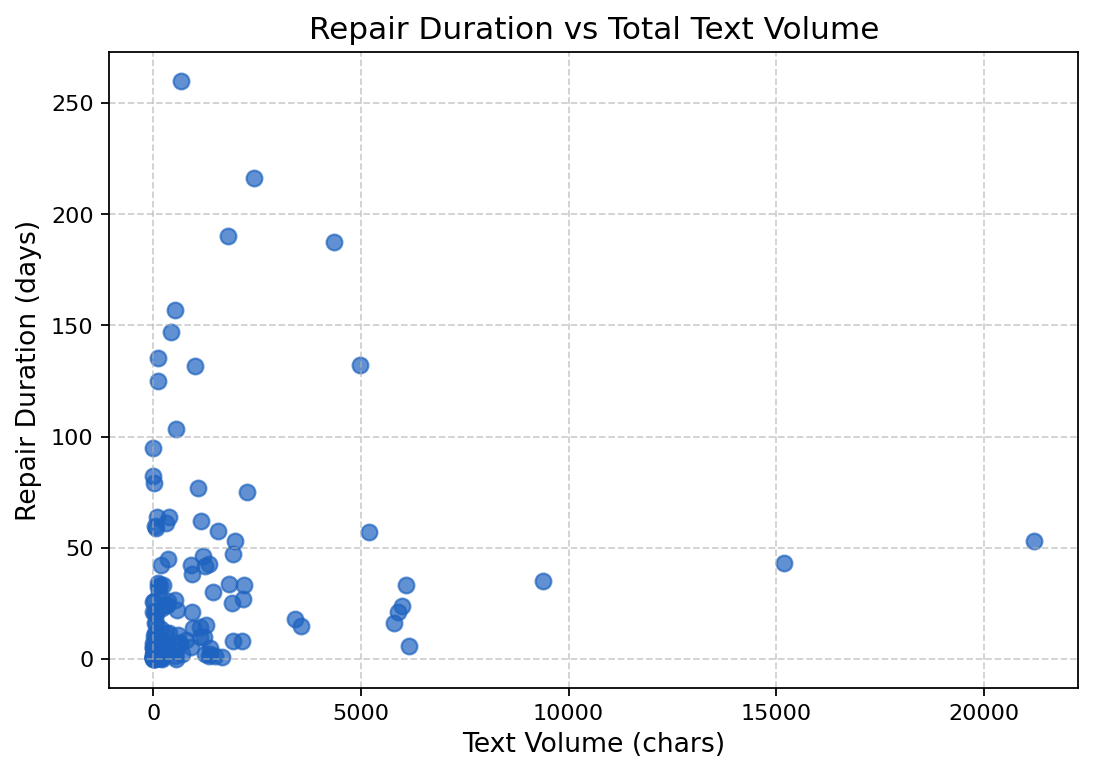

In [51]:
# Finding 2: Relationship between content/comment chars and fixed time
# Fig 2
df_2_copy["duration_total_days"] = df_2_copy["duration_total"].dt.total_seconds() / 86400.0
# --- Plot ---
fig2_1, ax2_1 = plt.subplots(figsize=(7, 5))

df_2_spectial = df_2_copy[
  (df_2_copy["duration_total_days"] > 100)
]
print(df_2_spectial["Bug编号"])
print(df_2_spectial["duration_total_days"])
print(df_2_spectial["tool_total_chars"])

## Linear regression
# sns.regplot(
#     data=df_2_copy,
#     x="duration_total_days",
#     y="tool_total_chars",
#     scatter_kws={"alpha": 0.7, "s": SCATTERP_SIZE_DEFAULT},
#     line_kws={"color": RED_COLOR_DEFAULT, "linewidth": 2.0},
#     color=BLUE_COLOR_DEFAULT,
#     ax=ax2_1
# )
ax2_1.scatter(
    x=df_2_copy["tool_total_chars"],
    y=df_2_copy["duration_total_days"],
    s=SCATTERP_SIZE_DEFAULT,
    alpha=0.7,
    color=BLUE_COLOR_DEFAULT,
)

## Just scat

ax2_1.set_title("Repair Duration vs Total Text Volume", fontsize=14)
ax2_1.set_xlabel("Text Volume (chars)")
ax2_1.set_ylabel("Repair Duration (days)")
ax2_1.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

1       54.024052
2       79.960834
3      180.000000
8        7.723476
9       44.763363
          ...    
150     13.952737
151      6.015038
152     43.991462
153     45.859873
154      2.326333
Name: tmp_div, Length: 139, dtype: float64


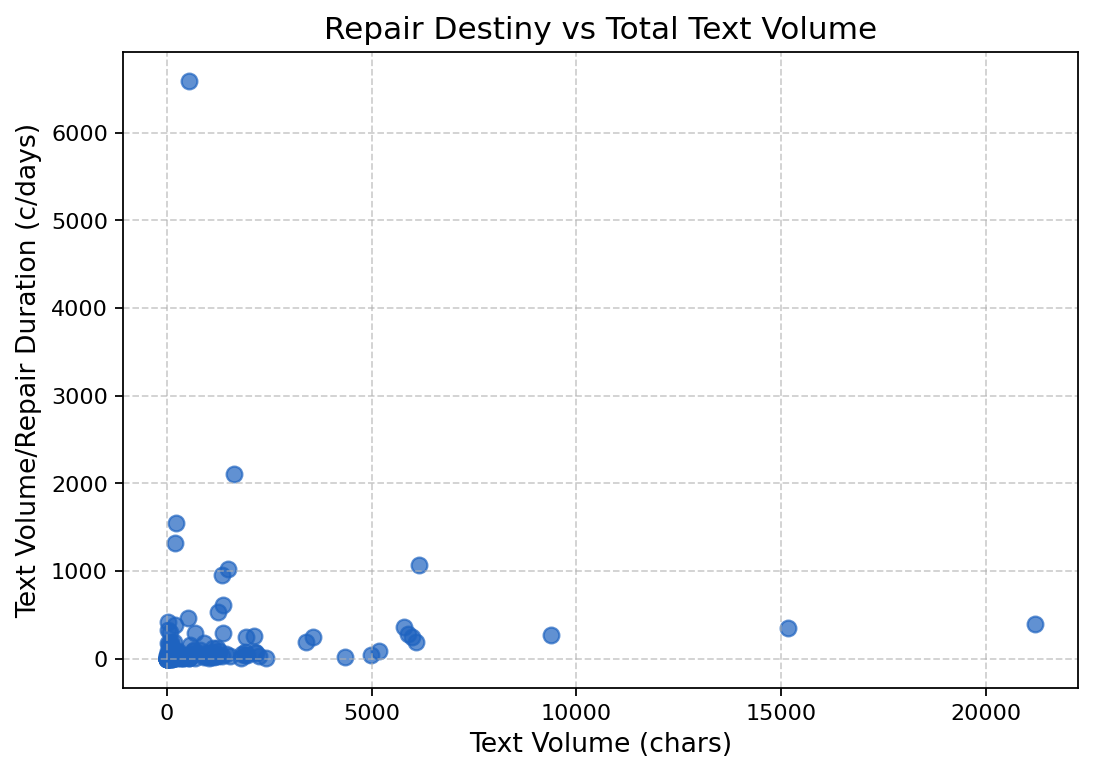

In [50]:
fig2_3,ax2_3 = plt.subplots(figsize=(7,5))

df_2_copy['tmp_div'] =df_2_copy["tool_total_chars"]/df_2_copy["duration_total_days"]
print(df_2_copy['tmp_div'])

ax2_3.scatter(
    x=df_2_copy["tool_total_chars"],
    y=df_2_copy["tmp_div"],
    s=SCATTERP_SIZE_DEFAULT,
    alpha=0.7,
    color=BLUE_COLOR_DEFAULT,
)

## Just scat

ax2_3.set_title("Repair Destiny vs Total Text Volume", fontsize=14)
ax2_3.set_xlabel("Text Volume (chars)")
ax2_3.set_ylabel("Text Volume/Repair Duration (c/days)")
ax2_3.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

In [48]:
# plt.figure(figsize=(8, 6))

# hb = plt.hexbin(
#     df_2_copy["duration_total_days"],
#     df_2_copy["tool_total_chars"],
#     gridsize=40,
#     cmap="Blues",
#     mincnt=1
# )

# plt.colorbar(hb, label="Count")
# plt.xlabel("Repair Duration (days)")
# plt.ylabel("Text Volume (chars)")
# plt.title("2D Density Heatmap: Duration vs Text Volume")

# plt.tight_layout()
# plt.show()

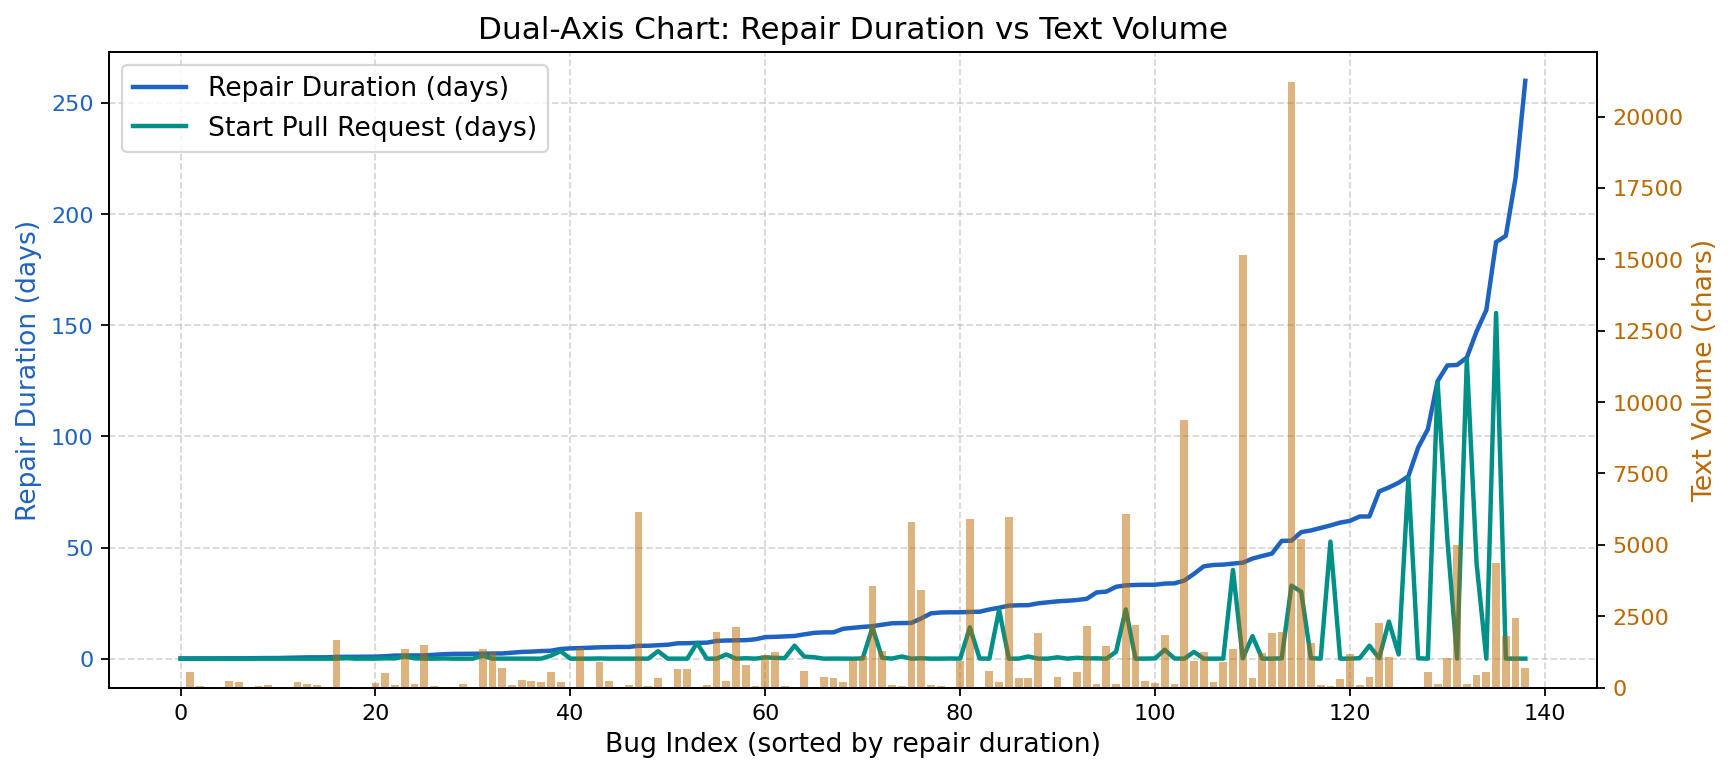

In [43]:
# =============================
# 1. 准备数据（排序）
# =============================
df_dual = df_2_copy[
    ["Bug编号", "tool_total_chars", "duration_total","duration_start","duration_success", "duration_total_days"]
].copy()

df_dual["duration_start_days"] = df_2_copy["duration_start"].dt.total_seconds() / 86400.0

# 修复时长转换为天
# df_dual["duration_total_days"] = df_dual["duration_total"].dt.total_seconds() / 86400.0

# 按修复时长排序
df_dual = df_dual.sort_values("duration_total_days").reset_index(drop=True)

x = np.arange(len(df_dual))  # bug index after sorting

# =============================
# 2. 创建图
# =============================
fig2_2, ax2_2 = plt.subplots(figsize=(11, 5))

# ---- 左轴（修复时间折线） ----
ax2_2.plot(
    x,
    df_dual["duration_total_days"],
    color=BLUE_COLOR_DEFAULT,  # 蓝色（你的 blue palette 第3色）
    linewidth=2.0,
    label="Repair Duration (days)",
)

# ---- 左轴 额外（显示启动修复时间）
ax2_2.plot(
  x,
  df_dual["duration_start_days"],
  color=TEAL_COLOR_DEFAULT,
  linewidth=2.0,
  label="Start Pull Request (days)"
)

ax2_2.legend()
ax2_2.set_xlabel("Bug Index (sorted by repair duration)")
ax2_2.set_ylabel("Repair Duration (days)", color=BLUE_COLOR_DEFAULT)
ax2_2.tick_params(axis="y", labelcolor=BLUE_COLOR_DEFAULT)
ax2_2.grid(True, linestyle="--", alpha=0.5)

# ---- 右轴（文本量柱状） ----
ax2_2_copy = ax2_2.twinx()

ax2_2_copy.bar(
    x,
    df_dual["tool_total_chars"],
    color=ORANGE_COLOR_DEFAULT,
    alpha=0.5,
    label="Text Volume (chars)",
)

ax2_2_copy.set_ylabel("Text Volume (chars)", color=ORANGE_COLOR_DEFAULT)
ax2_2_copy.tick_params(axis="y", labelcolor=ORANGE_COLOR_DEFAULT)

# =============================
# 3. 标题与布局
# =============================
plt.title("Dual-Axis Chart: Repair Duration vs Text Volume", fontsize=14)
fig2_2.tight_layout()
plt.show()

In [44]:
# df_dual1 = df_2_copy[[
#     "Bug编号",
#     "duration_total",
#     "duration_total_days",
#     "tool_total_chars"
# ]].copy()

# # df_dual1["duration_total_days"] = df_dual1["duration_total"].dt.total_seconds() / 86400.0

# # 排序（趋势更清晰）
# df_dual1 = df_dual1.sort_values("duration_total_days").reset_index(drop=True)
# x = np.arange(len(df_dual1))

# # Colors
# COLOR_BAR = BLUE_COLOR_DEFAULT   # 蓝色（柱状）
# COLOR_LINE = TEAL_COLOR_DEFAULT  # 青绿色（折线）

# # =============================
# # 图形
# # =============================
# fig, ax2_3 = plt.subplots(figsize=(12, 6))

# # 左轴：柱状图（修复总时长）
# ax2_3.bar(
#     x,
#     df_dual1["duration_total_days"],
#     color=COLOR_BAR,
#     alpha=0.7,
#     label="Repair Duration (days)"
# )
# ax2_3.set_ylabel("Repair Duration (days)", color=COLOR_BAR)
# ax2_3.tick_params(axis="y", labelcolor=COLOR_BAR)
# ax2_3.set_xlabel("Bug Index (sorted by repair duration)")
# ax2_3.grid(True, linestyle="--", alpha=0.5)

# # 右轴：折线图（文本量）
# ax2_3_copy = ax2_3.twinx()
# ax2_3_copy.plot(
#     x,
#     df_dual1["tool_total_chars"],
#     color=COLOR_LINE,
#     linewidth=2.0,
#     label="Text Volume (chars)"
# )
# ax2_3_copy.set_ylabel("Text Volume (chars)", color=COLOR_LINE)
# ax2_3_copy.tick_params(axis="y", labelcolor=COLOR_LINE)

# # 图例组合
# h1, l1 = ax2_3.get_legend_handles_labels()
# h2, l2 = ax2_3_copy.get_legend_handles_labels()
# ax2_3.legend(h1 + h2, l1 + l2, loc="upper left")

# plt.title("Dual-Axis Chart (Bar: Repair Duration | Line: Text Volume)", fontsize=15)
# plt.tight_layout()
# plt.show()